# **Introduction**
Earthquake is an inevitable natural disaster, and it causes huge losses to natural and human society. 
We now have the recent 50 years' Significant Earthquakes report, and will test if there is a relationship between different seasons/time and earthquake frequency, so we can understand the earthquake more and be more prepared for it.

# **Hypothesis**
####H0:There is no significant difference in four different seasons for significant  earthquakes Frequency.
####Ha:There is a significant difference between spring and other seasons for significant earthquakes Frequency.
####Ha:There is a significant difference between summer and other seasons for significant earthquakes Frequency.
####Ha:There is a significant difference between fall and other seasons for significant earthquakes Frequency.
####Ha:There is a significant difference between winter and other seasons for significant earthquakes Frequency.

In [ ]:
# Let's get ready to our data!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

%matplotlib inline

#Let's import our dataset

earthquakeinfo = pd.read_csv("https://earthquake.usgs.gov/fdsnws/event/1/query.csv?starttime=1970-12-20%2000:00:00&endtime=2020-12-27%2023:59:59&minmagnitude=6&eventtype=earthquake&orderby=time-asc")

#Let's check if our data works
earthquakeinfo.info()
earthquakeinfo.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6958 entries, 0 to 6957
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             6958 non-null   object 
 1   latitude         6958 non-null   float64
 2   longitude        6958 non-null   float64
 3   depth            6958 non-null   float64
 4   mag              6958 non-null   float64
 5   magType          6958 non-null   object 
 6   nst              2171 non-null   float64
 7   gap              2761 non-null   float64
 8   dmin             1020 non-null   float64
 9   rms              5844 non-null   float64
 10  net              6958 non-null   object 
 11  id               6958 non-null   object 
 12  updated          6958 non-null   object 
 13  place            6958 non-null   object 
 14  type             6958 non-null   object 
 15  horizontalError  868 non-null    float64
 16  depthError       1625 non-null   float64
 17  magError      

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1970-12-28T20:03:26.000Z,-5.242,153.520,55.0,6.6,mw,NaN,NaN,NaN,NaN,iscgem,iscgem789605,2015-05-13T18:53:04.000Z,"New Ireland region, Papua New Guinea",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
1,1970-12-29T02:26:08.000Z,-10.436,161.395,30.0,6.7,mw,NaN,NaN,NaN,NaN,iscgem,iscgem789614,2020-07-09T23:52:27.385Z,Solomon Islands,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
2,1971-01-01T07:58:03.000Z,-4.190,141.183,35.0,6.0,mw,NaN,NaN,NaN,NaN,iscgem,iscgem787816,2020-07-09T23:45:57.285Z,"New Guinea, Papua New Guinea",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
3,1971-01-03T17:35:41.000Z,-55.918,-2.668,15.0,7.1,mw,NaN,NaN,NaN,NaN,iscgem,iscgem787884,2015-05-13T18:53:04.000Z,southern Mid-Atlantic Ridge,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
4,1971-01-08T14:45:31.000Z,47.341,154.247,35.0,6.2,mw,NaN,NaN,NaN,NaN,iscgem,iscgem787995,2015-05-13T18:53:04.000Z,Kuril Islands,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem


### Since the seasons are different months for the Southern Hemisphere and Northern Hemisphere. The data set will be split into two DataFrames for the Southern Hemisphere and Northern Hemisphere by latitude. After that, we will determine which seasons that each earthquake occurs. 

- Latitude degree > 0 will be Northern Hemisphere
- Latitude degree < 0 will be Southern Hemisphere
- March, April, May will be Springtime
- June, July, August will be Summertime
- September, October, November will be Fall time
- December, January, February will be Wintertime

In [ ]:
# Let's use Northern Hemisphere data in this test.

N_Hemisphere = earthquakeinfo[earthquakeinfo['latitude'] > 0]
EQ_NH_spring = N_Hemisphere[pd.DatetimeIndex(N_Hemisphere['time']).month.isin([3,4,5]) ]
EQ_NH_summer = N_Hemisphere[pd.DatetimeIndex(N_Hemisphere['time']).month.isin([6,7,8]) ]
EQ_NH_fall = N_Hemisphere[pd.DatetimeIndex(N_Hemisphere['time']).month.isin([9,10,11]) ]
EQ_NH_Winter = N_Hemisphere[pd.DatetimeIndex(N_Hemisphere['time']).month.isin([12,1,2]) ]


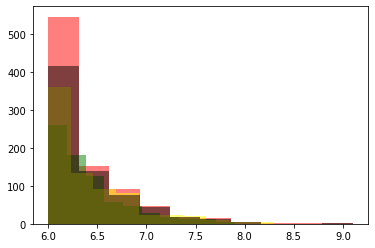

DescribeResult(nobs=877, minmax=(6.0, 9.1), mean=6.380980615735462, variance=0.18315542998911818, skewness=1.9069960378722202, kurtosis=4.936138036982875)
DescribeResult(nobs=748, minmax=(6.0, 7.9), mean=6.389211229946523, variance=0.16452936362204615, skewness=1.4682771863426953, kurtosis=1.8868275222395683)
DescribeResult(nobs=754, minmax=(6.0, 8.3), mean=6.404336870026525, variance=0.19144690363215577, skewness=1.5349638630716582, kurtosis=2.3634665494208997)
DescribeResult(nobs=710, minmax=(6.0, 9.1), mean=6.396619718309858, variance=0.18328898071078092, skewness=1.6208289695421805, kurtosis=3.4172298410756037)


In [ ]:

# Let's check the normality test of our data sets
plt.hist(EQ_NH_spring['mag'], alpha = .5, color = "red")
plt.hist(EQ_NH_summer['mag'], alpha = .5, color = "green")
plt.hist(EQ_NH_fall['mag'], alpha = .5, color = "yellow")
plt.hist(EQ_NH_Winter['mag'], alpha = .5, color = "black")

plt.show()

# Let's check the skewnesss and kurtosis of our data set
print(stats.describe(EQ_NH_spring['mag']))
print(stats.describe(EQ_NH_summer['mag']))
print(stats.describe(EQ_NH_fall['mag']))
print(stats.describe(EQ_NH_Winter['mag']))



#### By looking at the histogram, these variables do not appear normally distributed. We will need to conduct a non-parametric test, which we will try to use a one-sample proportion z-test to compare the percentage of each seasons’ significant earthquake frequency. 

#### To use a one-sample proportion test, we should have our dataset follow the conditions below.

 - random sample from the population 
 - population is 10 times larger than sample 
 - n*p >= 10 and n*(1-p) >= 10, which n will be our sample size and p is the true population proportion

In [ ]:
# lets get counts of the Northern Hemisphere as our population
NH_count_row = N_Hemisphere.shape[1]
print(count_row)

3089


In [ ]:
# We are going to get 300 random samples from the Northern Hemisphere.

sampleset_of_NH = N_Hemisphere.sample(300, random_state=0)

# #Let's check if our sample set works
sampleset_of_NH.info()
sampleset_of_NH.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 2181 to 2144
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             300 non-null    object 
 1   latitude         300 non-null    float64
 2   longitude        300 non-null    float64
 3   depth            300 non-null    float64
 4   mag              300 non-null    float64
 5   magType          300 non-null    object 
 6   nst              89 non-null     float64
 7   gap              111 non-null    float64
 8   dmin             44 non-null     float64
 9   rms              254 non-null    float64
 10  net              300 non-null    object 
 11  id               300 non-null    object 
 12  updated          300 non-null    object 
 13  place            300 non-null    object 
 14  type             300 non-null    object 
 15  horizontalError  40 non-null     float64
 16  depthError       80 non-null     float64
 17  magError    

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
2181,1989-09-20T13:19:31.980Z,51.184,178.821,33.0,6.2,mw,NaN,NaN,NaN,1.10,us,usp0003ztv,2018-06-04T20:43:45.000Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
5553,2011-03-09T21:24:01.680Z,38.296,142.808,15.0,6.5,mwc,224.0,39.6,NaN,0.99,us,usp000hvkh,2015-05-13T18:53:59.000Z,"near the east coast of Honshu, Japan",earthquake,NaN,10.5,NaN,NaN,reviewed,us,gcmt
1526,1985-03-09T14:08:04.380Z,66.239,-150.029,11.8,6.2,mw,NaN,NaN,NaN,0.90,us,usp0002cmd,2018-06-04T20:43:45.000Z,northern Alaska,earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
1498,1984-12-30T23:33:37.720Z,24.641,92.891,22.6,6.0,mw,NaN,NaN,NaN,1.10,us,usp0002ajx,2020-08-26T23:53:45.731Z,India-Bangladesh border region,earthquake,NaN,3.8,NaN,NaN,reviewed,us,hrv
3376,1997-02-27T21:30:36.570Z,29.985,67.977,33.0,6.0,mb,NaN,NaN,NaN,0.96,us,usp0007xx7,2020-09-15T19:22:48.975Z,Pakistan,earthquake,NaN,NaN,NaN,83.0,reviewed,us,us


#### We have 300 samples, and we have the first two conditions fulfilled for the one-sample proportion test.
- random sample from the population
- population is ten times larger than the sample

#### For third condition:
-  n = 300, p = 0.25 (since each seasons is 1/4 of an year)
-  np >= 10 --> (300*0.25) = 75 >10
-  n(1-p) >= 10 (300*0.75) = 225 >10

#### We have the third condition fulfilled. 
# *Now, let's get started with our one-sample proportion test.*
##H0:There is no significant difference in four different seasons for significant earthquakes Frequency.
##Ha: There is a significant difference between spring and other seasons for significant earthquakes Frequency.


In [ ]:
# Let's classify which seasons that each earthquake occurs.
sample_spring = sampleset_of_NH[pd.DatetimeIndex(sampleset_of_NH['time']).month.isin([3,4,5]) ]
sample_summer = sampleset_of_NH[pd.DatetimeIndex(sampleset_of_NH['time']).month.isin([6,7,8]) ]
sample_fall = sampleset_of_NH[pd.DatetimeIndex(sampleset_of_NH['time']).month.isin([9,10,11]) ]
sample_winter = sampleset_of_NH[pd.DatetimeIndex(sampleset_of_NH['time']).month.isin([12,1,2]) ]

# Let's test the spring sample proportion first
NH_sample_count = sampleset_of_NH.shape[0] # get the nobs
Spring_count = sample_spring.shape[0] # get the count
print(Spring_count)

proportions_ztest(count=Spring_count, nobs = NH_sample_count,value = 0.25)



91


(2.0094942637295423, 0.04448474241709023)

# **Results**

### According to the one proportion test result above, the p-value is < 0.05. We will reject the null hypothesis that there is no significant difference in four different seasons for significant earthquakes Frequency. 

### We can also confirm the significant difference between spring and other seasons for significant earthquakes Frequency.

#Next we are going to test the other three hypothesis.

##Ha:There is a significant difference between summer and other seasons for significant earthquakes Frequency.


In [ ]:
Summer_count = sample_summer.shape[0] # get the count
print(Summer_count)

proportions_ztest(count=Summer_count, nobs = NH_sample_count,value = 0.25)

79


(0.5243375207009967, 0.6000438044346696)

# **Results**
#### p-value > 0.05, there is no significant difference between summer and other seasons for significant earthquakes frequency. Therefore, we will reject second alternative hypothesis.

##Ha:There is a significant difference between fall and other seasons for significant earthquakes Frequency.


In [ ]:
fall_count = sample_fall.shape[0] # get the count
print(fall_count)

proportions_ztest(count=fall_count, nobs = NH_sample_count,value = 0.25)

70


(-0.682523632789935, 0.49490790441001786)

# **Results**

p-value > 0.05, there is no significant difference between fall and summer for significant earthquake frequency. Therefore, we will reject the second alternative hypothesis.

##Ha: There is a significant difference between winter and other seasons for significant earthquakes Frequency.

In [ ]:
winter_count = sample_winter.shape[0] # get the count
print(winter_count)

proportions_ztest(count=winter_count, nobs = NH_sample_count,value = 0.25)

60


(-2.165063509461096, 0.030382821976577573)

# **Results**
P-value < 0.05, there is a significant difference between winter and other seasons for significant earthquakes Frequency. According to the count, we can tell winter is a lot less than the different three seasons. 

## *Let's conduct a histogram for samples of four seasons.*


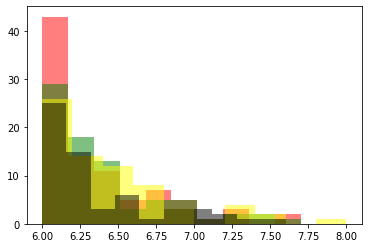

In [ ]:
plt.hist(sample_spring['mag'], alpha = .5, color = "red")
plt.hist(sample_summer['mag'], alpha = .5, color = "green")
plt.hist(sample_fall['mag'], alpha = .5, color = "yellow")
plt.hist(sample_winter['mag'], alpha = .5, color = "black")
plt.show()

### The histogram shows us intuitively there is a significant difference between spring and other seasons. Also, there is no significant difference between summer and fall. Also, winter has a lower Frequency.

## **Discussions and Recommendations**
### Even though the data collected from the whole world, there might be some earthquakes that occur in the ocean that we were unable to detect. Some places are located on the active seismic belt, and that might also be the bias that will influence the analysis. If I could collect new data in this domain, I will classify the location by the seismic zone's activation and conduct the test in smaller areas. Depth info and the time info might also be useful to our predictions. 


### However, according to our test result, we can tell spring has a much higher probability of earthquakes occur. Therefore, governments and organizations will need to be more prepared for earthquake relief. The company can increase the first aid kit and emergency bag production volume for the spring quarter. The earthquake insurance companies can also arrange the expense budget for marketing and increase the advertising volume during the springtime. 
